In [1]:
#!/usr/bin/env python3
# initialization
%reset -f 
import importlib
import matplotlib.pyplot as plt

from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (
    NoiseModel,
    depolarizing_error,
)

# import basic plot tools
import matplotlib.pyplot as plt
import json
from qiskit.result import Result
import utilitiesSteaneCode as utl
import utilities as commonUtl
importlib.reload(utl)
importlib.reload(commonUtl)


basis1 = ["h", "s", "sdg", "cx", "t", "cxx"]
basis2 = ["cx", "id", "rz", "sx", "x"]
SHOTS=20000
noise_model=NoiseModel()
p1_err=3e-5
p2_err=2e-3
p3_err=2e-3

err1=depolarizing_error(p1_err, 1)
err2=depolarizing_error(p2_err, 2)
err3=depolarizing_error(p3_err, 3)
noise_model.add_all_qubit_quantum_error(err1, ["s", "sdg", "h", "t", "tdg", "sx", "sxdg", "x", "y", "z", "rz"])
noise_model.add_all_qubit_quantum_error(err2, ["cx"])
noise_model.add_all_qubit_quantum_error(err3, ["ccx"])

job_id="chvbt36nfq8rvo0o487g" #iterations= [31,37,43,49,55]
EXISTING_JOB=True

In [2]:
# Grover Experiment
iterations=[31,37,43,49,55] #pattern is 1+m*6 where m is an integer.
encoded_circs=[]
raw_circs=[]
correct_answers=[]

for rep in iterations:
    circ = transpile(commonUtl.grover_reps(rep), basis_gates=basis2, optimization_level=0)
    correct_answer = commonUtl.keys_to_binary(commonUtl.to_percentages(commonUtl.execute_circ_with_depol(circ, 0, SHOTS)))
    encoded_circ=utl.to_encoded_circ_IBMBasis(circ)
    correct_answers.append(correct_answer)
    encoded_circs.append(encoded_circ)
    raw_circs.append(circ)
    print(circ)
    print("IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII")
    print(encoded_circ)

if not EXISTING_JOB:
    backend=AerSimulator(noise_model=noise_model)
    counts=backend.run(raw_circs+encoded_circs).result().get_counts()
    # result=backend.run(raw_circs+encoded_circs, noise_model=noise_model, shots=SHOTS).result()
    # print(f"job id: {result.job_id}")
    # counts= result.get_counts()
else:
    with open(f"job-{job_id}/{job_id}-result.txt") as f:
        data=json.load(f)
    counts = Result.from_dict(data).get_counts()

global phase: 3π/2
        ┌─────────┐┌────┐┌─────────┐                                 »
   q_0: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──────────────────────────────■──»
        ├─────────┤├────┤├─────────┤┌─────────┐┌────┐┌─────────┐┌─┴─┐»
   q_1: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├»
        └─────────┘└────┘└─────────┘└─────────┘└────┘└─────────┘└───┘»
meas: 2/═════════════════════════════════════════════════════════════»
                                                                     »
«        ┌─────────┐┌────┐┌─────────┐ ┌───────┐                           »
«   q_0: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─┤ Rz(π) ├───────────────────────────»
«        ├─────────┤├────┤├─────────┤┌┴───────┴┐┌────┐┌─────────┐┌───────┐»
«   q_1: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π) ├»
«        └─────────┘└────┘└─────────┘└─────────┘└────┘└─────────┘└───────┘»
«meas: 2/═════════════════════════════════════════════════════════════════»
«                           

In [3]:
raw_counts=counts[:len(counts)//2]
encoded_counts=counts[len(counts)//2:]

post_select_counts=list(map(utl.post_select, encoded_counts))
post_select_rates=[sum(count.values())/SHOTS for count in post_select_counts]
post_select_dists=list(map(commonUtl.keys_to_binary, map(commonUtl.to_percentages, post_select_counts)))
encoded_ssos=list(map(commonUtl.get_sso, post_select_dists, correct_answers))

raw_dists=list(map(commonUtl.keys_to_binary, map(commonUtl.to_percentages, raw_counts)))
raw_ssos=list(map(commonUtl.get_sso, raw_dists, correct_answers))

print(f"post selected counts: {post_select_counts}")
print(f"post selected dists: {post_select_dists}")
print(f"post selected rates: {post_select_rates}")
print(f"post select SSO fidelity: {encoded_ssos}")
print(f"raw SSO fidelity: {raw_ssos}")
print(f"correct answers: {correct_answers}")
print(f"encoded counts: {encoded_counts}")

post selected counts: [{'11': 325}, {'01': 1, '11': 277}, {'11': 280}, {'11': 208}, {'11': 173}]
post selected dists: [{'0b11': 1.0}, {'0b1': 0.0035971223021582736, '0b11': 0.9964028776978417}, {'0b11': 1.0}, {'0b11': 1.0}, {'0b11': 1.0}]
post selected rates: [0.01625, 0.0139, 0.014, 0.0104, 0.00865]
post select SSO fidelity: [1.0, 0.9964028776978419, 1.0, 1.0, 1.0]
raw SSO fidelity: [0.907, 0.8840000000000001, 0.859, 0.855, 0.8159999999999998]
correct answers: [{'0b11': 1.0}, {'0b11': 1.0}, {'0b11': 1.0}, {'0b11': 1.0}, {'0b11': 1.0}]
encoded counts: [{'10000101011110': 1, '11001100100110': 1, '11010101001010': 1, '10111001011100': 1, '01111111101001': 1, '00001010110011': 1, '00100101001111': 1, '10001101000000': 1, '00000010100011': 1, '10000010011111': 1, '00011010001101': 2, '00111100011000': 1, '00000111010000': 3, '00011010110100': 1, '00000110001001': 1, '10100101011000': 1, '00010111111010': 1, '11100010001101': 1, '10110101111011': 1, '00110010010111': 1, '00011110011101': 1,

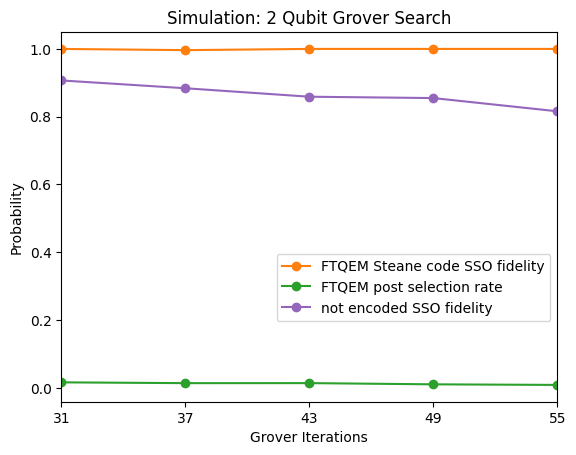

encoded sso: [1.0, 0.9964028776978419, 1.0, 1.0, 1.0]
post selection rate: [0.01625, 0.0139, 0.014, 0.0104, 0.00865]
correct: {'0b11': 1.0}
not encoded: [0.907, 0.8840000000000001, 0.859, 0.855, 0.8159999999999998]


In [4]:
fig, ax = plt.subplots()
plt.xlim([iterations[0], iterations[-1]])
plt.xticks(iterations)
plt.plot(iterations, encoded_ssos, label="FTQEM Steane code SSO fidelity", marker="o", color="C1")
plt.plot(iterations, post_select_rates, label=f"FTQEM post selection rate", marker="o", color="C2")
plt.plot(iterations, raw_ssos, label=f"not encoded SSO fidelity", marker="o", color="C4")
plt.ylabel('Probability')
plt.xlabel("Grover Iterations")
plt.title(f"Simulation: 2 Qubit Grover Search")
plt.legend(bbox_to_anchor=(1, 0.2), loc='lower right')
plt.show()
print(f"encoded sso: {encoded_ssos}")
print(f"post selection rate: {post_select_rates}")
print(f"correct: {correct_answer}")
print(f"not encoded: {raw_ssos}")